<a href="https://colab.research.google.com/github/RedZeptic/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/Thomas_Mineo_LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

## Assignment Part 1
### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.












#### During Lecture:

In [0]:
# Example graph to compare too
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

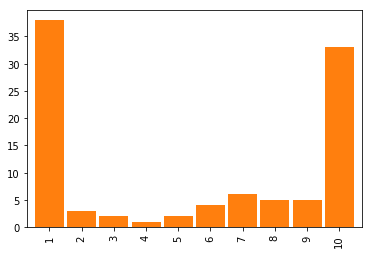

In [0]:
# Duplicated Lecture Code (not copy pasted)
fake = pd.Series([38,3,2,1,2,4,6,5,5,33], index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

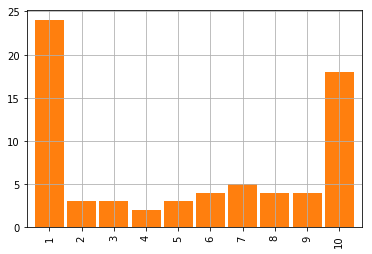

In [0]:
fake2 = pd.Series(
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    2,2,2,
    3,3,3,
    4,4,
    5,5,5,
    6,6,6,6,
    7,7,7,7,7,
    8,8,8,8,
    9,9,9,9,
    10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10])

ax = fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);
ax.grid(True)

##### My Replication

In [0]:
y_tick_labels = ['0  ','10  ','20  ','30  ','40%']
y_ticks = [0,10,20,30,40]

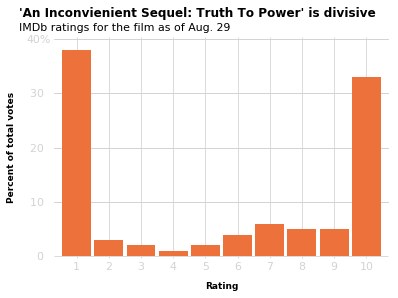

In [91]:
# plt.style.use('fivethirtyeight')

fig = plt.figure()
fig.patch.set(facecolor='white')

ax = fake.plot.bar(color='#ED713A', width=0.9, zorder=3)
ax.set(facecolor='white')
plt.grid(which='major', color='#d3d3d3', zorder=1)

ax.text(x=-1.8, y=44, s="'An Inconvienient Sequel: Truth To Power' is divisive", fontweight='bold', fontsize=12)
ax.text(x=-1.8, y=41.5, s="IMDb ratings for the film as of Aug. 29", fontsize=11)

ax.set_ylabel("Percent of total votes", labelpad=10, fontsize=9, fontweight='bold')
ax.set_xlabel('Rating', labelpad=10, fontsize=9, fontweight='bold')

ax.set_xticklabels(range(1,11), rotation=0, fontsize=11, color='#d3d3d3')
ax.set_yticklabels(y_tick_labels, fontsize=11, color='#d3d3d3')

ax.set_yticks(y_ticks)

ax.set_frame_on(False)
ax.tick_params(axis='x', which='major', top=True, direction='out', length=2.0, color='#d3d3d3')
ax.tick_params(axis='y', which='major', direction='in', length=334.0, color='#d3d3d3')

plt.show() # my recreation of the orig plot

In [0]:
display(example) # original plot reference material

## Assignment Part 2
### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

In [0]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# importing dataframe
df_orig = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')

In [20]:
# checking out the data
df_orig.head(17)

age     n  alcohol-use  ...  meth-frequency  sedative-use  sedative-frequency
0      12  2798          3.9  ...               -           0.2                13.0
1      13  2757          8.5  ...             5.0           0.1                19.0
2      14  2792         18.1  ...            24.0           0.2                16.5
3      15  2956         29.2  ...            10.5           0.4                30.0
4      16  3058         40.1  ...            36.0           0.2                 3.0
5      17  3038         49.3  ...            48.0           0.5                 6.5
6      18  2469         58.7  ...            12.0           0.4                10.0
7      19  2223         64.6  ...           105.0           0.3                 6.0
8      20  2271         69.7  ...            12.0           0.5                 4.0
9      21  2354         83.2  ...             2.0           0.3                 9.0
10  22-23  4707         84.2  ...            46.0           0.2                52.0
11  24-25  4591         83.1  ...            21.0           0.2                17.5
12  26-29  2628         80.7  ...            30.0           0.4                 4.0
13  30-34  2864         77.5  ...            54.0           0.4                10.0
14  35-49  7391         75.0  ...           104.0           0.3                10.0
15  50-64  3923         67.2  ...            30.0           0.2               104.0
16    65+  2448         49.3  ...               -           0.0                15.0

[17 rows x 28 columns]

In [38]:
# selecting and setting up my df

# tried this way, couldnt figure it out.
# df = df_orig.iloc[15,] 

# cutting out the first 
df = df_orig.drop(df_orig.index[:15])
df = df.drop(df.index[1])
df

age     n  alcohol-use  ...  meth-frequency  sedative-use  sedative-frequency
15  50-64  3923         67.2  ...            30.0           0.2               104.0

[1 rows x 28 columns]

In [39]:
df.set_index('age',inplace=True)
df.head()

n  alcohol-use  ...  sedative-use  sedative-frequency
age                       ...                                  
50-64  3923         67.2  ...           0.2               104.0

[1 rows x 27 columns]

In [40]:
df = df[['marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]

df.rename(columns={'marijuana-use':'Marijuana', 'cocaine-use':'Cocaine', 'crack-use':'Crack', 'heroin-use':'Heroin',
                   'hallucinogen-use':'Hallucinogen', 'inhalant-use':'Inhalant', 'pain-releiver-use':'Pain reliever', 'oxycontin-use':'OxyContin',
                   'tranquilizer-use':'Tranquilizer', 'stimulant-use':'Stimulant', 'meth-use':'Meth', 'sedative-use':'Sedative'},
                   inplace=True)
df = df[['Marijuana','Pain reliever','Tranquilizer','Cocaine',
         'Crack','OxyContin','Stimulant','Hallucinogen',
         'Sedative','Inhalant','Meth','Heroin']]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [41]:
df.head()

Marijuana  Pain reliever  Tranquilizer  ...  Inhalant  Meth  Heroin
age                                            ...                        
50-64        7.3            2.5           1.4  ...       0.2   0.2     0.1

[1 rows x 12 columns]

#### Replicating the Graph

In [31]:
# showing the graph im trying to replicate
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png'
original = Image(url=url, width=575)

display(original)

In [143]:
# because the %'s are different on the graph vs the data they provided, I'm changing the datasets values to match.

d = {'Marijuana':7.29,'Pain reliever':2.52,'Tranquilizer':1.43,'Cocaine':0.87,
         'Crack':0.36,'OxyContin':0.36,'Stimulant':0.28,'Hallucinogen':0.25,
         'Sedative':0.23,'Inhalant':0.15,'Meth':0.15,'Heroin':0.05}

df = pd.DataFrame(d, index=['50-64'])
df

Marijuana  Pain reliever  Tranquilizer  ...  Inhalant  Meth  Heroin
50-64       7.29           2.52          1.43  ...      0.15  0.15    0.05

[1 rows x 12 columns]

<Figure size 432x288 with 0 Axes>

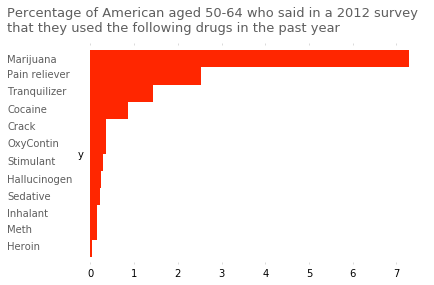

In [183]:
# now to reproduce this graph as best as I can

fig = plt.figure()
fig.patch.set(facecolor='white')

# redefines the df as ax with filled in args
ax = df.plot.barh(color='#FF2600', width=10)

# sets the Axes background color to white
ax.set(facecolor='white')

# removing ticks
ax.set_yticklabels('y')
ax.tick_params(axis='y', which='major', top=False, bottom=False, left=False, right=False)

ax.tick_params(axis='x', which='major', top=True, direction='out', length=2.0, color='#d3d3d3')

# text
ax.text(x=-1.9, y=-5.9, color='#5E5E5E', fontsize=13, s='Percentage of American aged 50-64 who said in a 2012 survey\nthat they used the following drugs in the past year')
ax.text(x=-1.9, y=-4.4, color='#5E5E5E', fontsize=10, s='Marijuana')
ax.text(x=-1.9, y=-3.69, color='#5E5E5E', fontsize=10, s='Pain reliever')
ax.text(x=-1.9, y=-2.85, color='#5E5E5E', fontsize=10, s='Tranquilizer')
ax.text(x=-1.9, y=-2, color='#5E5E5E', fontsize=10, s='Cocaine')
ax.text(x=-1.9, y=-1.2, color='#5E5E5E', fontsize=10, s='Crack')
ax.text(x=-1.9, y=-0.38, color='#5E5E5E', fontsize=10, s='OxyContin')
ax.text(x=-1.9, y=0.5, color='#5E5E5E', fontsize=10, s='Stimulant')
ax.text(x=-1.9, y=1.4, color='#5E5E5E', fontsize=10, s='Hallucinogen')
ax.text(x=-1.9, y=2.2, color='#5E5E5E', fontsize=10, s='Sedative')
ax.text(x=-1.9, y=3, color='#5E5E5E', fontsize=10, s='Inhalant')
ax.text(x=-1.9, y=3.8, color='#5E5E5E', fontsize=10, s='Meth')
ax.text(x=-1.9, y=4.6, color='#5E5E5E', fontsize=10, s='Heroin')

# x & y labels
# ax.set_xlabel('x')
# ax.set_ylabel('y')

ax.legend().remove()
ax.set_frame_on(False)
plt.gca().invert_yaxis()
plt.show();

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here